In [4]:
import pickle
from collections import Counter

import numpy
from matplotlib import pyplot as matpyplot
import folium

In [5]:
FILEPATH_1 = (
    '../data/20240521/'
    'gnss_test_raw_data_1716472705.1320515.pickle'
)

FILEPATH_2 = (
    '../data/20240521/'
    'gnss_test_raw_data_1716473898.1400812.pickle'
)

FILEPATH_3 = (
    '../data/20240521/'
    'gnss_test_raw_data_1716535003.8263893.pickle'
)

In [6]:
with open(FILEPATH_1, 'rb') as handle:
    f1_gnss_raw_data = pickle.load(handle)

with open(FILEPATH_2, 'rb') as handle:
    f2_gnss_raw_data = pickle.load(handle)

with open(FILEPATH_3, 'rb') as handle:
    f3_gnss_raw_data = pickle.load(handle)

In [7]:
print('Filepath 1')
f1_gnss_raw_data_narray = numpy.array(f1_gnss_raw_data)
print(f1_gnss_raw_data_narray.shape)
print('Filepath 2')
f2_gnss_raw_data_narray = numpy.array(f2_gnss_raw_data)
print(f2_gnss_raw_data_narray.shape)
print('Filepath 3')
f3_gnss_raw_data_narray = numpy.array(f3_gnss_raw_data)
print(f3_gnss_raw_data_narray.shape)

Filepath 1
(1603, 4)
Filepath 2
(1616, 4)
Filepath 3
(1156, 4)


# Exploring the trajectory as captured from the Intel RealSense Tracking Camera

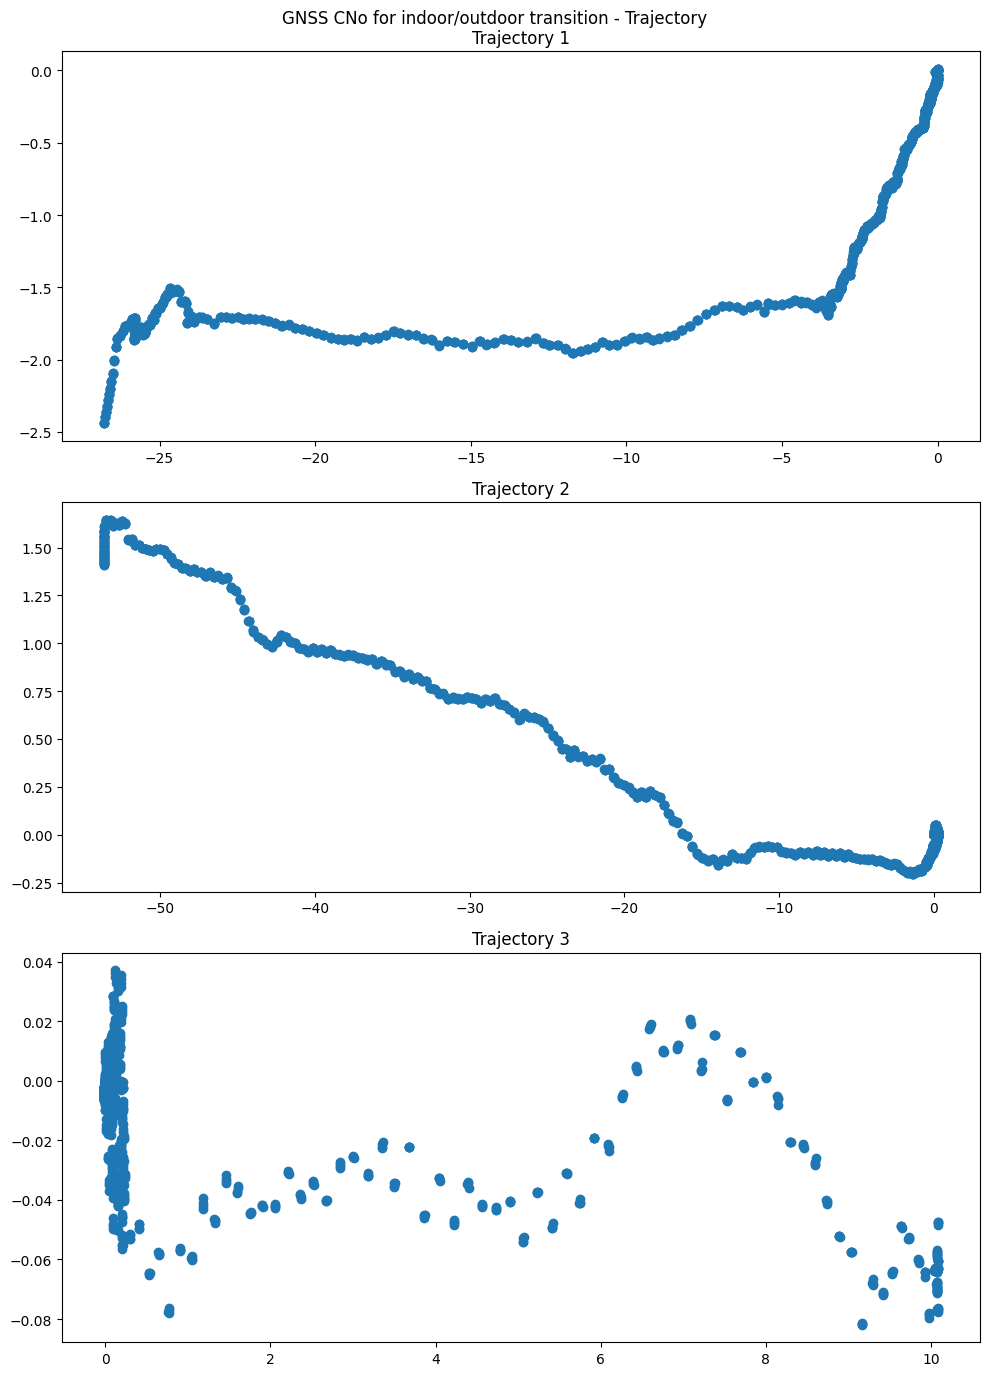

In [8]:
fig, axs = matpyplot.subplots(
    nrows=3,
    ncols=1,
    figsize=(10, 14)
)
fig.suptitle('GNSS CNo for indoor/outdoor transition - Trajectory')

axs[0].scatter(f1_gnss_raw_data_narray[:, 2], f1_gnss_raw_data_narray[:, 3])
axs[0].set_title('Trajectory 1')
axs[1].scatter(f2_gnss_raw_data_narray[:, 2], f2_gnss_raw_data_narray[:, 3])
axs[1].set_title('Trajectory 2')
axs[2].scatter(f3_gnss_raw_data_narray[:, 2], f3_gnss_raw_data_narray[:, 3])
axs[2].set_title('Trajectory 3')

matpyplot.tight_layout()

# Extracting latitude and longitude

In [9]:
def inspect_ubxmsg_data(ubxmsg_data_record):
    MSGS_IDs =  []
    MSGS_IDs_count = Counter()

    init_ts = None
    final_ts = None

    for ubx_msg_ts in ubxmsg_data_record:
        ubxmsg = ubx_msg_ts[0]

        if init_ts is None:
            init_ts = ubx_msg_ts[1]
        final_ts = ubx_msg_ts[1]

        if ubxmsg:
            if not ubxmsg.identity in MSGS_IDs:
                print(str(ubxmsg.identity))
                MSGS_IDs.append(ubxmsg.identity)
        
            MSGS_IDs_count.update({f"{ubxmsg.identity}": 1})

    total_recording_time = final_ts - init_ts

    print(len(MSGS_IDs))
    print(MSGS_IDs_count.items())
    print(f'Data recording started at: {init_ts}')
    print(f'Data recording ended at: {final_ts}')
    print(
        f'Data recording duration: {total_recording_time} sec'
        f' OR {(total_recording_time) / 60} min'
    )

In [10]:
def building_batches_ubxmsg_data(
        ubxmsg_data_record,
        skip_msgs_list=[],
):
    # This block of code captures the batch of messages in the whole list.
    # Whenever the cycle of messages repeats itself the batch of messages is stored
    starting_id = None

    MSGS_BATCH = []
    ALL_MSGS = []
    for i, ubxmsg in enumerate(ubxmsg_data_record):
        ubxmsg_info = ubxmsg[0]

        if ubxmsg_info:
            if ubxmsg_info.identity in skip_msgs_list:
                continue

            if starting_id is None:
                starting_id = ubxmsg_info.identity

            if ubxmsg_info.identity == starting_id:
                if MSGS_BATCH:
                    ALL_MSGS.append(MSGS_BATCH)
                MSGS_BATCH = [ubxmsg_info]
            else:
                MSGS_BATCH.append(ubxmsg_info)
    ALL_MSGS.append(MSGS_BATCH)

    print(f'Batch of messages captured: {len(ALL_MSGS)}')
    return ALL_MSGS

In [11]:
inspect_ubxmsg_data(f1_gnss_raw_data)

NAV-PVT
GNGST
NAV-SAT
RXM-MEASX
4
dict_items([('NAV-PVT', 401), ('GNGST', 401), ('NAV-SAT', 401), ('RXM-MEASX', 400)])
Data recording started at: 1716472705.5644548
Data recording ended at: 1716472838.3829107
Data recording duration: 132.81845593452454 sec OR 2.213640932242076 min


In [12]:
ALL_MSGS_f1 = building_batches_ubxmsg_data(f1_gnss_raw_data)
print(len(ALL_MSGS_f1))

ALL_MSGS_f2 = building_batches_ubxmsg_data(f2_gnss_raw_data)
print(len(ALL_MSGS_f2))

ALL_MSGS_f3 = building_batches_ubxmsg_data(f3_gnss_raw_data)
print(len(ALL_MSGS_f3))

Batch of messages captured: 401
401
Batch of messages captured: 404
404
Batch of messages captured: 289
289


In [13]:
ALL_MSGS_f3[0]

[UBXMessage(b'\x02', b'\x14', 0, payload=b"\x01\x00\x00\x00\xb4\xe9O\x1b\xe4n\xf4\x1b\x04\xb3O\x1b\xb4\xe9O\x1b\xb4\xe9O\x1b\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x10.\x00\x00\x00\x00\x00\x00\x00\x00\x06\xff\x1b\x01x\xf5\xff\xff@\xf7\xff\xffI\x01\xad\x02\n\xa5\x14\x00\x00\x16\x00\x00\x00\x1d\x19\x01\x8b\n\x00\x00\xa3\x08\x00\x00\xff\xff\xde\x03\x8c@$e\xff\x1b\x00\x00\x06\t\x18\x01\xf2B\x00\x00\x9c7\x00\x00%\x01R\x03~f\x12\x00\x00\x1a\x00\x00\x06\x08\x12\x02x\xe8\xff\xfff\xec\xff\xffR\x00\xec\x03L2\x05\x00\x00 \x00\x00\x00\x0b\x17\x01\xab\xd1\xff\xff\x0e\xda\xff\xff\xff\xff9\x01\xd6\xc4_f\xff\x1a\x00\x00\x00\x0c\x0b\x01\xaa\xbe\xff\xff~\xca\xff\xff\xff\xffu\x00m_\xd6f\xff'\x00\x00\x00\x04\x16\x01\xce\x01\x00\x00z\x01\x00\x00\xff\xff\xe9\x03 \xe4\xb1f\xff\x1a\x00\x00\x00\x12\x18\x01NM\x00\x00@Q\x00\x00\r\x00\x88\x03.o\x00\x00\x00\x1a\x00\x00\x00\x0b\x18\x01\xc0\xd1\xff\xffd\xcf\xff\xff\xf7\x03I\x02\x84\xc4\x1f\x00\x001\x00\x00\x00\x1f\x18\x01\x9c\xff\xff\xff\x97\xff\xff\xff\xc5\x03\x92

In [14]:
def extracting_features_ubxmsgs(ubx_allmsgs_data):
    # SATID, Batch + Features composition (columns)
    # Batch, Full sat id, gnss id, sat id, CNo, PR, DM, HD, VD, PD, TD, El, Az, NSV, Multipath
    ALL_MSGS_FEATURES = []

    for n_batch, gnssmsgs_batch in enumerate(ubx_allmsgs_data):
        # For every batch

        for data_msg in gnssmsgs_batch:
            # Go through every msg and extract info
            
            if data_msg.identity == 'NAV-PVT':
                meas_lon = data_msg.lon
                meas_lat = data_msg.lat
                # Position list to store lat and lon
                position = (meas_lat, meas_lon)

        ALL_MSGS_FEATURES.append(position)

    return ALL_MSGS_FEATURES

In [15]:
f1_position_msgs = extracting_features_ubxmsgs(ALL_MSGS_f1)
f1_position_msgs_narray = numpy.array(f1_position_msgs)
f2_position_msgs = extracting_features_ubxmsgs(ALL_MSGS_f2)
f2_position_msgs_narray = numpy.array(f2_position_msgs)
f3_position_msgs = extracting_features_ubxmsgs(ALL_MSGS_f3)
f3_position_msgs_narray = numpy.array(f3_position_msgs)


# Displaying the map

In [17]:
m = folium.Map(location=f1_position_msgs[205], zoom_start=20)

trail_coordinates = f1_position_msgs

folium.PolyLine(
    trail_coordinates,
    color='red',
).add_to(m)

folium.Marker(
    location=f1_position_msgs[345],
    icon=folium.Icon(color="green"),
).add_to(m)

folium.Marker(
    location=f1_position_msgs[0],
    icon=folium.Icon(color="blue"),
).add_to(m)
folium.Marker(
    location=f1_position_msgs[-1],
    icon=folium.Icon(color="orange"),
).add_to(m)

# m.save("filepath_1_trajectory_map_alone.html")
m